<a href="https://colab.research.google.com/github/bereml/iap/blob/master/libretas/5a_human_protein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descarga de Human Protein Atlas Image Classification

Curso: [Introducción al Aprendizaje Profundo](http://turing.iimas.unam.mx/~ricardoml/course/iap/). Profesores: [Bere](https://turing.iimas.unam.mx/~bereml/) y [Ricardo](https://turing.iimas.unam.mx/~ricardoml/) Montalvo Lezama.

---
---

Esta libreta descarga una version preprocesada (256x256) de los datos de la competencia [Human Protein Atlas Image Classification](https://www.kaggle.com/c/human-protein-atlas-image-classification/).

## 1. Preparación

### 1.1. Bibliotecas

In [1]:
from os.path import join

# redes visión
import torchvision.datasets.utils as tvdu

# imágenes
from skimage import io

# barras de progreso
from tqdm.auto import trange

### 1.2. Auxiliares

In [2]:
# directorio de datos
ROOT_DIR = '../datos/human-protein-atlas-image-classification'
DATA_DIR = join(ROOT_DIR, 'human-protein-atlas-image-classification')
FILENAME = 'human-protein-atlas-image-classification.tar'

## 2. Datos

In [3]:
! mkdir -p {ROOT_DIR}

In [4]:
# https://drive.google.com/file/d/1X7u3uccLOyT7AdEb8_IQ71vniNrlDkDz/view?usp=sharing
tvdu.download_file_from_google_drive(
    file_id='1X7u3uccLOyT7AdEb8_IQ71vniNrlDkDz',
    root=ROOT_DIR,
    filename=FILENAME
)

0it [00:00, ?it/s]

In [5]:
! ls -R {ROOT_DIR} | head -10

../datos/human-protein-atlas-image-classification:
human-protein-atlas-image-classification.tar


In [6]:
! tar -xf {ROOT_DIR}/{FILENAME} -C {ROOT_DIR}

In [7]:
! ls -R {DATA_DIR} | head -10

../datos/human-protein-atlas-image-classification/human-protein-atlas-image-classification:
train
train.csv

../datos/human-protein-atlas-image-classification/human-protein-atlas-image-classification/train:
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_red.png
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_yellow.png
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_blue.png
ls: write error: Broken pipe


In [8]:
img_id = '0bbad1dc-bba9-11e8-b2ba-ac1f6b6435d0'
imgs_names = [f'{img_id}_{color}.png' 
        for color in ['blue', 'green', 'red', 'yellow']]
imgs_names

['0bbad1dc-bba9-11e8-b2ba-ac1f6b6435d0_blue.png',
 '0bbad1dc-bba9-11e8-b2ba-ac1f6b6435d0_green.png',
 '0bbad1dc-bba9-11e8-b2ba-ac1f6b6435d0_red.png',
 '0bbad1dc-bba9-11e8-b2ba-ac1f6b6435d0_yellow.png']

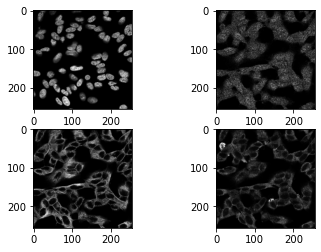

In [9]:
imgs = [io.imread(join(DATA_DIR, 'train', img_name)) 
        for img_name in imgs_names]
io.imshow_collection(imgs, cmap='gray')
io.show()